In [1]:
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn import pipeline
from sklearn import metrics
import sklearn
import openml

class HyperParamOptimizer:
    
    def __init__(self, models, params):
        self.grid_searches = {}
        self.models = models
        self.params = params
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.models.keys():
            print('Running GridSearchCV for {0}.'.format(key))
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params,cv=5, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        
        df = pd.concat(frames)
        df = df.reset_index()
        df = df.drop(['index','rank_test_score'],axis=1)
        return df


In [2]:
openml_list = openml.datasets.list_datasets(tag='OpenML100')
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
# datalist = datalist[[
#     'did','name','NumberOfInstances',
#     'NumberOfFeatures','NumberOfClasses'
# ]]
datalist.head(n=92)


did                               name format  status  \
3          3                           kr-vs-kp   ARFF  active   
6          6                             letter   ARFF  active   
11        11                      balance-scale   ARFF  active   
12        12                      mfeat-factors   ARFF  active   
14        14                      mfeat-fourier   ARFF  active   
15        15                           breast-w   ARFF  active   
16        16                     mfeat-karhunen   ARFF  active   
18        18                mfeat-morphological   ARFF  active   
20        20                        mfeat-pixel   ARFF  active   
22        22                      mfeat-zernike   ARFF  active   
23        23                                cmc   ARFF  active   
24        24                           mushroom   ARFF  active   
28        28                          optdigits   ARFF  active   
29        29                    credit-approval   ARFF  active   
31        31                           credit-g   ARFF  active   
32        32                          pendigits   ARFF  active   
36        36                            segment   ARFF  active   
37        37                           diabetes   ARFF  active   
38        38                               sick   ARFF  active   
42        42                            soybean   ARFF  active   
44        44                           spambase   ARFF  active   
46        46                             splice   ARFF  active   
50        50                        tic-tac-toe   ARFF  active   
54        54                            vehicle   ARFF  active   
60        60                      waveform-5000   ARFF  active   
151      151                        electricity   ARFF  active   
182      182                           satimage   ARFF  active   
188      188                         eucalyptus   ARFF  active   
300      300                             isolet   ARFF  active   
307      307                              vowel   ARFF  active   
...      ...                                ...    ...     ...   
1478    1478                                har   ARFF  active   
1479    1479                        hill-valley   ARFF  active   
1480    1480                               ilpd   ARFF  active   
1485    1485                            madelon   ARFF  active   
1486    1486                              nomao   ARFF  active   
1487    1487                    ozone-level-8hr   ARFF  active   
1489    1489                            phoneme   ARFF  active   
1491    1491          one-hundred-plants-margin   ARFF  active   
1492    1492           one-hundred-plants-shape   ARFF  active   
1493    1493         one-hundred-plants-texture   ARFF  active   
1494    1494                        qsar-biodeg   ARFF  active   
1497    1497              wall-robot-navigation   ARFF  active   
1501    1501                            semeion   ARFF  active   
1504    1504                 steel-plates-fault   ARFF  active   
1510    1510                               wdbc   ARFF  active   
1515    1515                         micro-mass   ARFF  active   
1590    1590                              adult   ARFF  active   
4134    4134                        Bioresponse   ARFF  active   
4135    4135             Amazon_employee_access   ARFF  active   
4534    4534                   PhishingWebsites   ARFF  active   
4538    4538  GesturePhaseSegmentationProcessed   ARFF  active   
6332    6332                     cylinder-bands   ARFF  active   
23380  23380                                cjs   ARFF  active   
23381  23381                      dresses-sales   ARFF  active   
23512  23512                              higgs   ARFF  active   
40496  40496          LED-display-domain-7digit   ARFF  active   
40499  40499                            texture   ARFF  active   
40536  40536                        SpeedDating   ARFF  active   
40668  40668                          connect-4  

In [3]:
benchmark_suite = openml.study.get_study('OpenML100','tasks')
# for task_id in benchmark_suite.tasks:
#     task = openml.tasks.get_task(task_id)
#     X,y = task.get_X_and_y()
#     odata = openml.datasets.get_dataset(task.dataset_id)
#     X,y,attribute_names = odata.get_data(target=odata.default_target_attribute,return_attribute_names=True)
# #     print(attribute_names)
    

# 6 is letter
task = openml.tasks.get_task(6)
X,y = task.get_X_and_y()
X.shape

(20000, 16)

In [4]:
# svm_pipeline = pipeline.make_pipeline(SVC(max_iter=30))
# models = {
#     'SVM': svm_pipeline
# }

# gamma_space = np.logspace(-10,2,num=20)
# C_space = np.logspace(-4,10,num=20)
# params = { 
#     'SVM': [{ 'svc__kernel': ['rbf'],'svc__gamma':gamma_space, 'svc__C':C_space }]
# }

# optimizer = HyperParamOptimizer(models, params)
# f1_score = metrics.make_scorer(metrics.f1_score,average='micro')
# optimizer.fit(X, y, scoring=f1_score, n_jobs=-1)
# optimizer.score_summary()

<IPython.core.display.Javascript object>


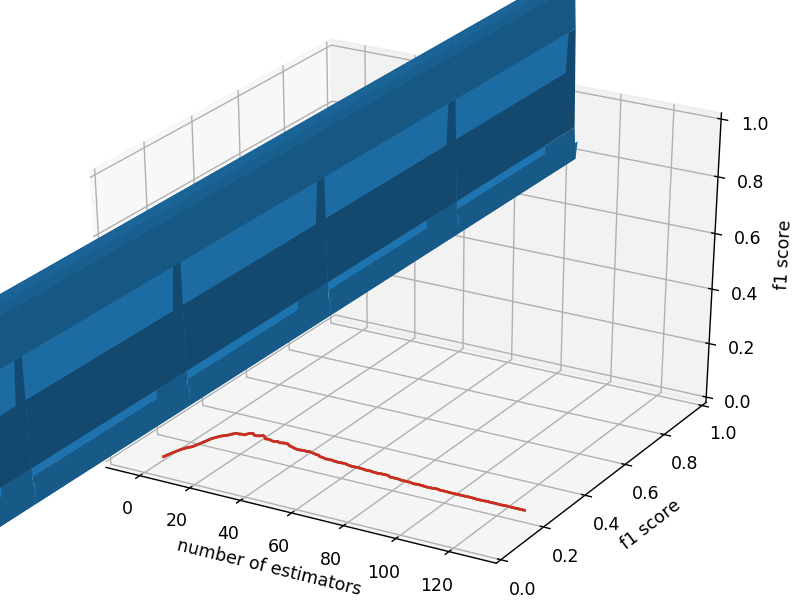

In [5]:
df = pd.read_pickle('svm_pandas.json') 
# df = optimizer.score_summary()
# df.to_pickle('svm_pandas.json') 
df1 = df[['params','mean_test_score']]
scores = np.empty([20, 20])
# df_c = df1[[for C in  if df1['params']['svc__C'] == C]]
score_index = 0
for C in np.logspace(-4,10,num=20):
    temp_scores = []
    for index, row in df1.iterrows():
        if(row['params']['svc__C'] == C):
            temp_scores.append(row["mean_test_score"])
    scores[score_index,:] = temp_scores
    score_index = score_index+1
    

# 2d plot
# fig = plt.figure()
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax = plt.axes(projection='3d')
# plt.show()

fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(-4,10,20)
Y = np.linspace(-10,2,20)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, scores)
ax.set_xlabel( 'C(log)' )
ax.set_ylabel( 'gamma(log)')
ax.set_zlabel( 'f1 score' )
ax.set_zlim3d(0,1) 
# fig.colorbar(surf)

plt.show()
            

In [6]:
from sklearn.impute import SimpleImputer
# strategy='mean'
# sklearn.preprocessing.data.OneHotEncoder()
adaboost_pipeline = pipeline.make_pipeline(AdaBoostClassifier())
# randomforest_pipeline = pipeline.make_pipeline(SimpleImputer(missing_values=np.nan,strategy='mean'),
#                                                sklearn.feature_selection.variance_threshold.VarianceThreshold(),
#                                                sklearn.preprocessing.StandardScaler(with_mean=False),
#                                                 RandomForestClassifier())
models = { 
    'AdaBoostClassifier': adaboost_pipeline,
#     'RandomForestClassifier': randomforest_pipeline
}

# print(adaboost_pipeline.get_params().keys())
# print(randomforest_pipeline.get_params().keys())

param_range = np.linspace(1,128,128,dtype=int)

params = { 
    'AdaBoostClassifier':  { 'adaboostclassifier__n_estimators': param_range },
#     'RandomForestClassifier': [
#         { 'randomforestclassifier__n_estimators': param_range },
#         {'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__n_estimators': param_range}]
}

optimizer = HyperParamOptimizer(models, params)
f1_score = metrics.make_scorer(metrics.f1_score,average='micro')
# optimizer.fit(X, y, scoring=f1_score, n_jobs=-1)
# optimizer.score_summary()


In [ ]:
df_forest_letter = optimizer.score_summary()
df_forest_letter.to_pickle('df_forest_letter.json') 

In [7]:
# tasks_to_verify = [9985,3021]
tasks_to_verify = [6]
for task_id in benchmark_suite.tasks:
    if task_id in tasks_to_verify:
        task = openml.tasks.get_task(task_id)
        X,y = task.get_X_and_y()
        optimizer.fit(X, y, scoring=f1_score, n_jobs=-1)
        df_temp = optimizer.score_summary()
        df_temp.to_pickle('df_adaboost_{0}.json'.format(task_id)) 
    

Running GridSearchCV for AdaBoostClassifier.
Done.


c:\users\dbansal\appdata\local\conda\conda\envs\ml-assign\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\dbansal\appdata\local\conda\conda\envs\ml-assign\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\dbansal\appdata\local\conda\conda\envs\ml-assign\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

In [8]:
def plot(df_plot,isDataframe = True):
    x = np.linspace(1,128,128,dtype=int)
    if isDataframe:
        plt.plot(x,df_plot.mean_test_score.values)
    else:
        plt.plot(x,df_plot)
    plt.xlabel('number of estimators')
    plt.ylabel('f1 score')
#     plt.xlim(1,128)
    plt.ylim(0,1)
    plt.show()

In [9]:
def plot_adaboost(pandas_frame):
    plot(pandas_frame)

In [10]:
def plot_randomforest(pandas_frame):
    temp_scores_noencoding = []
    for index, row in pandas_frame.iterrows():
        if(len(row['params']) == 1):
            temp_scores_noencoding.append(row["mean_test_score"])
    plot(temp_scores_noencoding,False)

In [ ]:
for task_id in benchmark_suite.tasks:
    print(task_id)

In [13]:
# 6,9985
tasks_to_plot = [6]
for task_id in tasks_to_plot:
    print(task_id)
    df_tree = pd.read_pickle('df_adaboost_{0}.json'.format(task_id))
    df_adaboost = df_tree[df_tree['estimator'] == 'AdaBoostClassifier']
    df_random_forest = df_tree[df_tree['estimator'] == 'RandomForestClassifier']
    print(df_adaboost)
    plot_adaboost(df_adaboost)
#     plot_randomforest(df_random_forest)


6
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.046391      0.008111         0.005738        0.005744   
1         0.080020      0.005998         0.017059        0.001873   
2         0.126579      0.012932         0.018213        0.003117   
3         0.176146      0.026069         0.033196        0.008788   
4         0.199244      0.016406         0.032394        0.004033   
5         0.241473      0.019059         0.046570        0.009569   
6         0.283259      0.014941         0.042483        0.001044   
7         0.328379      0.021040         0.059972        0.017711   
8         0.355907      0.008692         0.064100        0.010668   
9         0.408251      0.031317         0.058806        0.003209   
10        0.443821      0.019067         0.074939        0.008775   
11        0.469029      0.016870         0.082725        0.005637   
12        0.517228      0.034628         0.084864        0.004436   
13        0.546930      0.015182